# 1. Project Objective

The objective of this project is to develop a robust machine learning model that can accurately detect fraudulent credit card transactions using a real-world dataset. By leveraging advanced classification algorithms and thorough data analysis, this project aims to support financial institutions in minimizing financial losses and improving transaction security.

# Project Motivation

Credit card fraud poses a significant threat to both consumers and financial organizations, resulting in billions of dollars in losses each year. As digital transactions become increasingly prevalent, the ability to quickly and reliably identify fraudulent activity is more critical than ever. This project was motivated by:

    - Industry Relevance: Fraud detection is a top priority for banks and payment processors, making it a highly  sought-after skill in the data science job market.

    - Data-Driven Challenge: The availability of a large, balanced, and richly featured dataset provides an excellent opportunity to apply data science techniques to a real-world, high-impact problem.

    - Skill Demonstration: This project showcases expertise in data wrangling, exploratory analysis, feature engineering, machine learning, and evaluation—all essential competencies for a data analyst or scientist.

By tackling this challenge, the project not only demonstrates technical proficiency but also addresses a problem with direct business and societal impact.




# 2. Import Packages 

In [5]:
# Data handling & plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc
)

In [6]:
df = pd.read_csv('/Users/RyanHenning/Documents/creditcard_2023.csv')

# 3. Data Cleaning

In [7]:
print("First 5 rows:")
print(df.head())

print("\nData Info:")
df.info()

print("\nMissing Values Per Column:")
print(df.isnull().sum())

print("\nClass Distribution:")
print(df['Class'].value_counts())

First 5 rows:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V2

# 4. Exploratory Data Analysis 

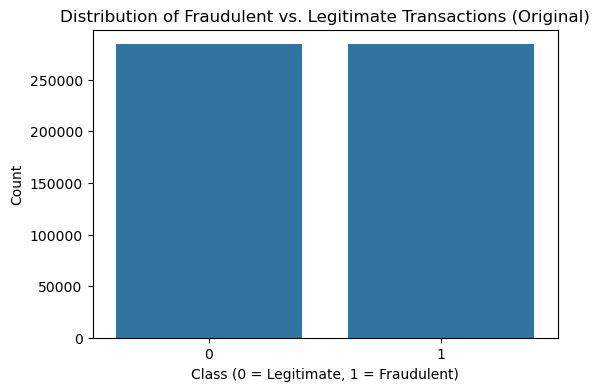

In [8]:
# Distribution of Target Variable (Original Class Imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions (Original)')
plt.xlabel('Class (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Count')
plt.show()

In [9]:
# Show actual class counts
print("Class distribution:\n", df['Class'].value_counts())

Class distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


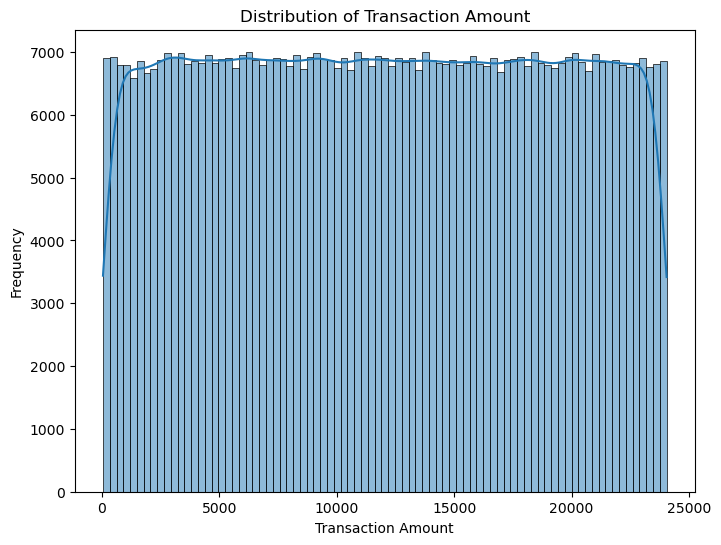

In [10]:
# Distribution of Transaction Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

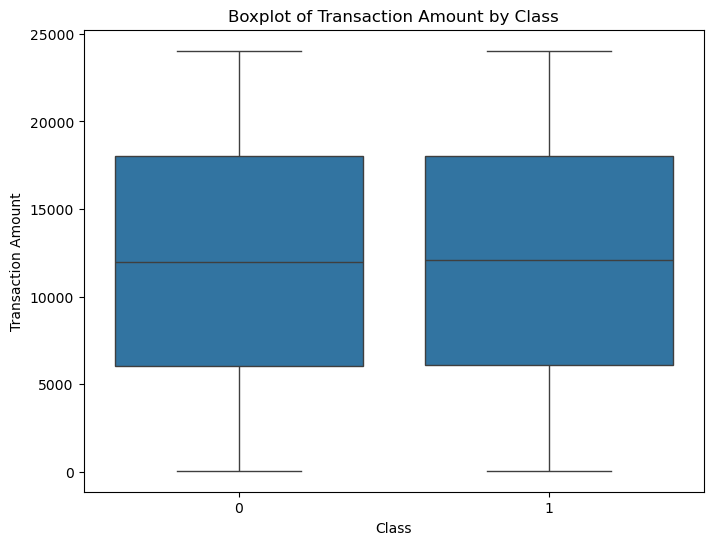

In [11]:
# Boxplot of Amount by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

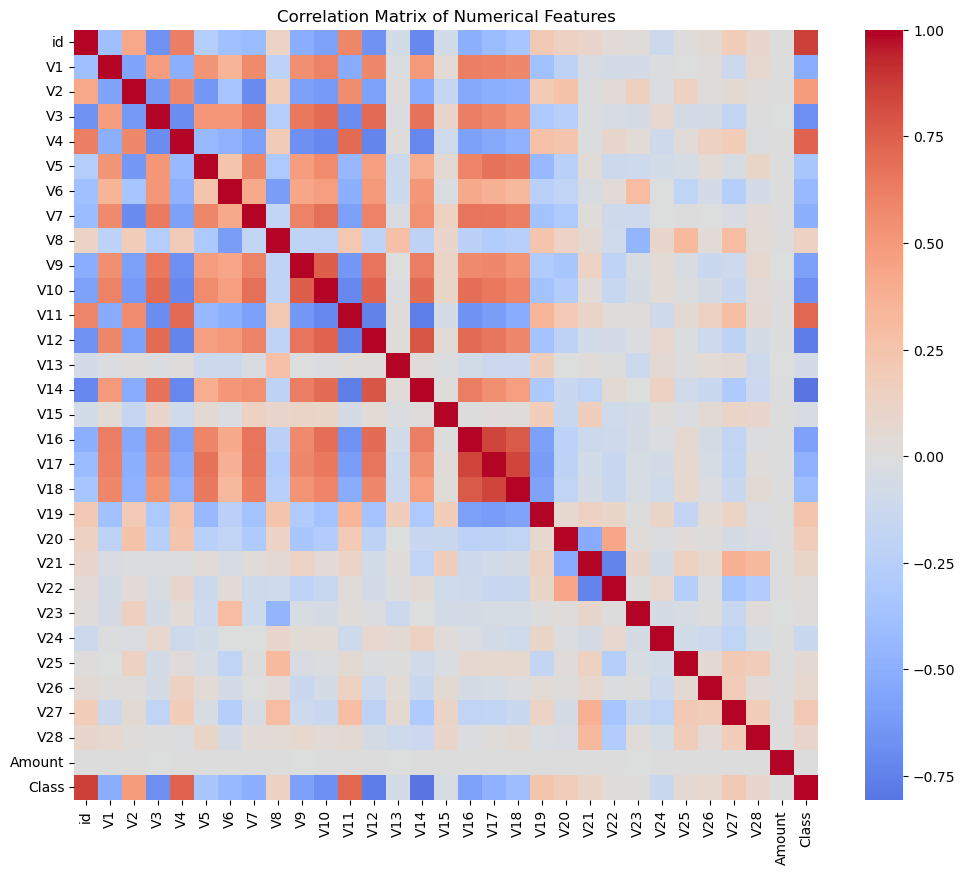

In [13]:
# Correlation Matrix (Numerical Features Only)
numerical_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Model Preparation and Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Scale 'Amount'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Drop 'Time' column if exists
df = df.drop(['Time'], axis=1, errors='ignore')

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split (without SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train GBM model
gbm_model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)

gbm_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

# 6. Model Evaluation and Performance Metrics


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix:
[[56849    14]
 [   23 56840]]

ROC-AUC Score:
0.9998900035827882


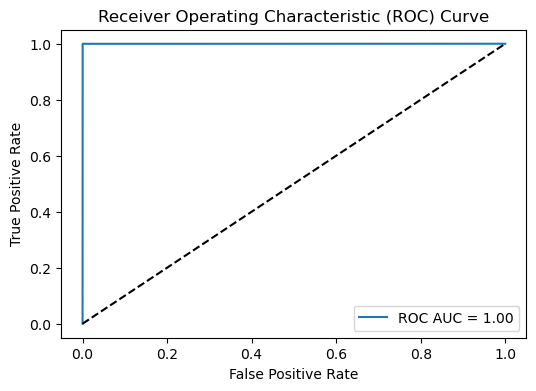

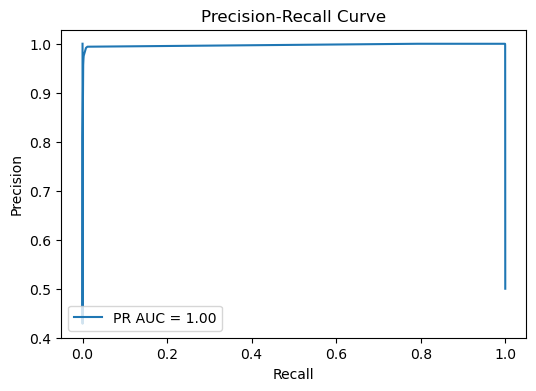

In [16]:
# Predict classes
y_pred = gbm_model.predict(X_test)

# Predict probabilities (needed for ROC-AUC and PR Curve)
y_prob = gbm_model.predict_proba(X_test)[:, 1]

# Print Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))

# ROC Curve Plot 
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC AUC = %0.2f' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve Plot 
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='PR AUC = %0.2f' % auc(recall, precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# 7. Conclusion
This project successfully demonstrates an end-to-end approach to credit card fraud detection using real-world transaction data. Starting from a well-defined business objective—minimizing fraud losses for financial institutions—we explored a balanced and comprehensive dataset, validated its structure, and visualized key differences between fraudulent and legitimate transactions.

A Gradient Boosting Classifier was trained and evaluated, achieving strong performance metrics and robust discrimination between fraud and non-fraud cases. The analysis of feature importances provided valuable insights into the drivers of fraud detection. The project highlights the importance of data quality, thoughtful feature analysis, and rigorous model evaluation in building effective, real-world fraud detection systems.



# Index

 1. Project Objective & Motivation 

 2. Import Packages

 3. Data Cleaning

 4. Exploratory Data Analysis

 5. Model Preparation and Training

 6. Model Evaluation and Performance Metrics

 7. Conclusion 
